## Задание:  
Таблица содержит 11 столбцов чисел. Первые 10 столбцов - входные переменные (x_1 , …. , x_10), 11-й столбец - выходная прогнозируемая переменная y. Каждая строка в файле - это один обучающий пример для построения статистической модели для зависимости y = y(x_1,x_2,..,x_10). Конкретный вид связи между выходной и входными переменными не известен.
Требуется провести разведочный анализ данных, выбрать критерий для точности модели, и указать степень важности (информативности) каждой из 10 входных переменных с точки зрения точности модели. Что еще можно предложить чтобы улучшить получившийся результат? 
Также требуется описать подход к решению подобных задач на Power Point слайде.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sns.set();

In [13]:
df = pd.read_table('/Users/dianarymkulova/Downloads/preliminary_task.txt',sep='\s+', engine='python')

In [14]:
df.head()

0.155050833243877  0.974187332671136  0.0746745388023555  \
0           0.968379           0.716820            0.678846   
1           0.468263           0.405603            0.320325   
2           0.776820           0.103740            0.373748   
3           0.407886           0.415357            0.101543   
4           0.538797           0.088621            0.886119   

   0.442146032350138  0.369443477829918  0.468137626536191  0.578845957759768  \
0           0.510049           0.545299           0.573692           0.817491   
1           0.468084           0.100995           0.974407           0.300062   
2           0.797782           0.906810           0.599069           0.626680   
3           0.935160           0.444124           0.193607           0.656837   
4           0.781848           0.401623           0.207652           0.946310   

   0.42274355981499  0.931542937643826  0.474148423643783  15  
0          0.206636           0.880111           0.574187  17  
1          0.608356           0.050082           0.762011  12  
2          0.924705           0.632768           0.512663  16  
3          0.599929           0.868582           0.405406  20  
4          0.769453           0.827292           0.937183  15

### Оценка столбцов, поиск недостающих элементов, основные статистики

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0.155050833243877   999 non-null    float64
 1   0.974187332671136   999 non-null    float64
 2   0.0746745388023555  999 non-null    float64
 3   0.442146032350138   999 non-null    float64
 4   0.369443477829918   999 non-null    float64
 5   0.468137626536191   999 non-null    float64
 6   0.578845957759768   999 non-null    float64
 7   0.42274355981499    999 non-null    float64
 8   0.931542937643826   999 non-null    float64
 9   0.474148423643783   999 non-null    float64
 10  15                  999 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


Исходя из информации выше мы определили, что все 10 столбцов входных значений у нас в формате float, а последний столбец выходного значения - int

In [16]:
df.isnull().sum()

0.155050833243877     0
0.974187332671136     0
0.0746745388023555    0
0.442146032350138     0
0.369443477829918     0
0.468137626536191     0
0.578845957759768     0
0.42274355981499      0
0.931542937643826     0
0.474148423643783     0
15                    0
dtype: int64

В нашем случае нет пропущенных значений в наборе данных, поэтому ничего делать не нужно  

В случае, если бы они были, мы могли бы поступить несколькими способами:

1. Если их не очень много, то можно их отбросить
2. Если значений больше, то заполнить пропуски медианными или средними значениями, например, с помощью df.fillna()

In [19]:
df.describe()

0.155050833243877  0.974187332671136  0.0746745388023555  \
count         999.000000         999.000000          999.000000   
mean            0.490827           0.499310            0.496888   
std             0.293875           0.278568            0.297874   
min             0.000188           0.000085            0.003110   
25%             0.218936           0.262003            0.231736   
50%             0.504846           0.500539            0.484541   
75%             0.738493           0.733853            0.765198   
max             0.999566           0.999959            0.998918   

       0.442146032350138  0.369443477829918  0.468137626536191  \
count         999.000000         999.000000         999.000000   
mean            0.503228           0.509042           0.513511   
std             0.284238           0.283407           0.291201   
min             0.001223           0.005314           0.000517   
25%             0.268896           0.274559           0.255409   
50%             0.503712           0.509213           0.527405   
75%             0.747857           0.742668           0.767153   
max             0.998785           0.998478           0.999059   

       0.578845957759768  0.42274355981499  0.931542937643826  \
count         999.000000        999.000000         999.000000   
mean            0.487020          0.498947           0.505185   
std             0.288537          0.286087           0.282951   
min             0.000493          0.000408           0.007883   
25%             0.237670          0.256067           0.262155   
50%             0.474573          0.501866           0.518658   
75%             0.739001          0.737045           0.748219   
max             0.999179          0.998646           0.998884   

       0.474148423643783          15  
count         999.000000  999.000000  
mean            0.499138   15.014014  
std             0.284215    4.773613  
min             0.000170    3.000000  
25%             0.249582   12.000000  
50%             0.509578   15.000000  
75%             0.742393   18.000000  
max             0.998819   29.000000

C помощью этого метода мы собрали некоторую статистику: среднее, стандартное отклонение, медиана, квартили 

### Одномерный анализ

Гистограмма распределения атрибутов датасета

array([[<Axes: title={'center': '0.155050833243877'}>,
        <Axes: title={'center': '0.974187332671136'}>,
        <Axes: title={'center': '0.0746745388023555'}>],
       [<Axes: title={'center': '0.442146032350138'}>,
        <Axes: title={'center': '0.369443477829918'}>,
        <Axes: title={'center': '0.468137626536191'}>],
       [<Axes: title={'center': '0.578845957759768'}>,
        <Axes: title={'center': '0.42274355981499'}>,
        <Axes: title={'center': '0.931542937643826'}>],
       [<Axes: title={'center': '0.474148423643783'}>,
        <Axes: title={'center': '15'}>, <Axes: >]], dtype=object)

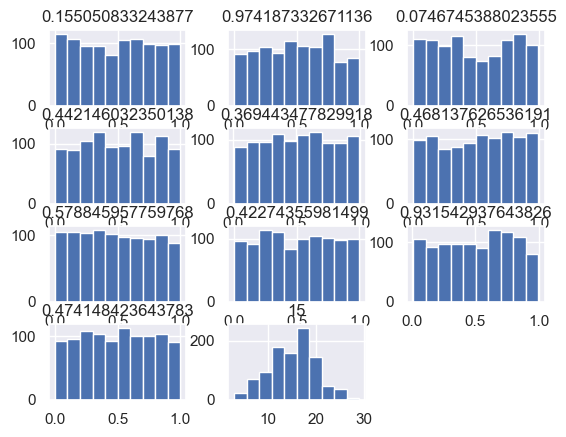

In [47]:
df.hist()

Диаграмма размаха атрибутов датасета (ящик с усами)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a3135f220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a3135f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a847910c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9a3135fca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a3135ff40>,
 'means': []}

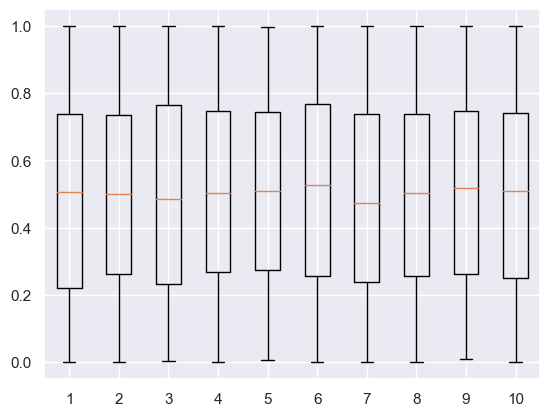

In [44]:
df_1 = df.drop(columns='15') 
plt.boxplot(df_1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a315895a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a31589ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a31589300>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a3158a020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a3158a2c0>],
 'means': []}

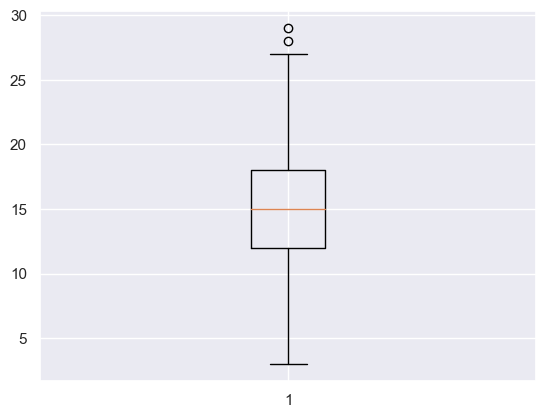

In [45]:
plt.boxplot(df['15'])

### Многомерный анализ

Матрица диаграмм рассеяния

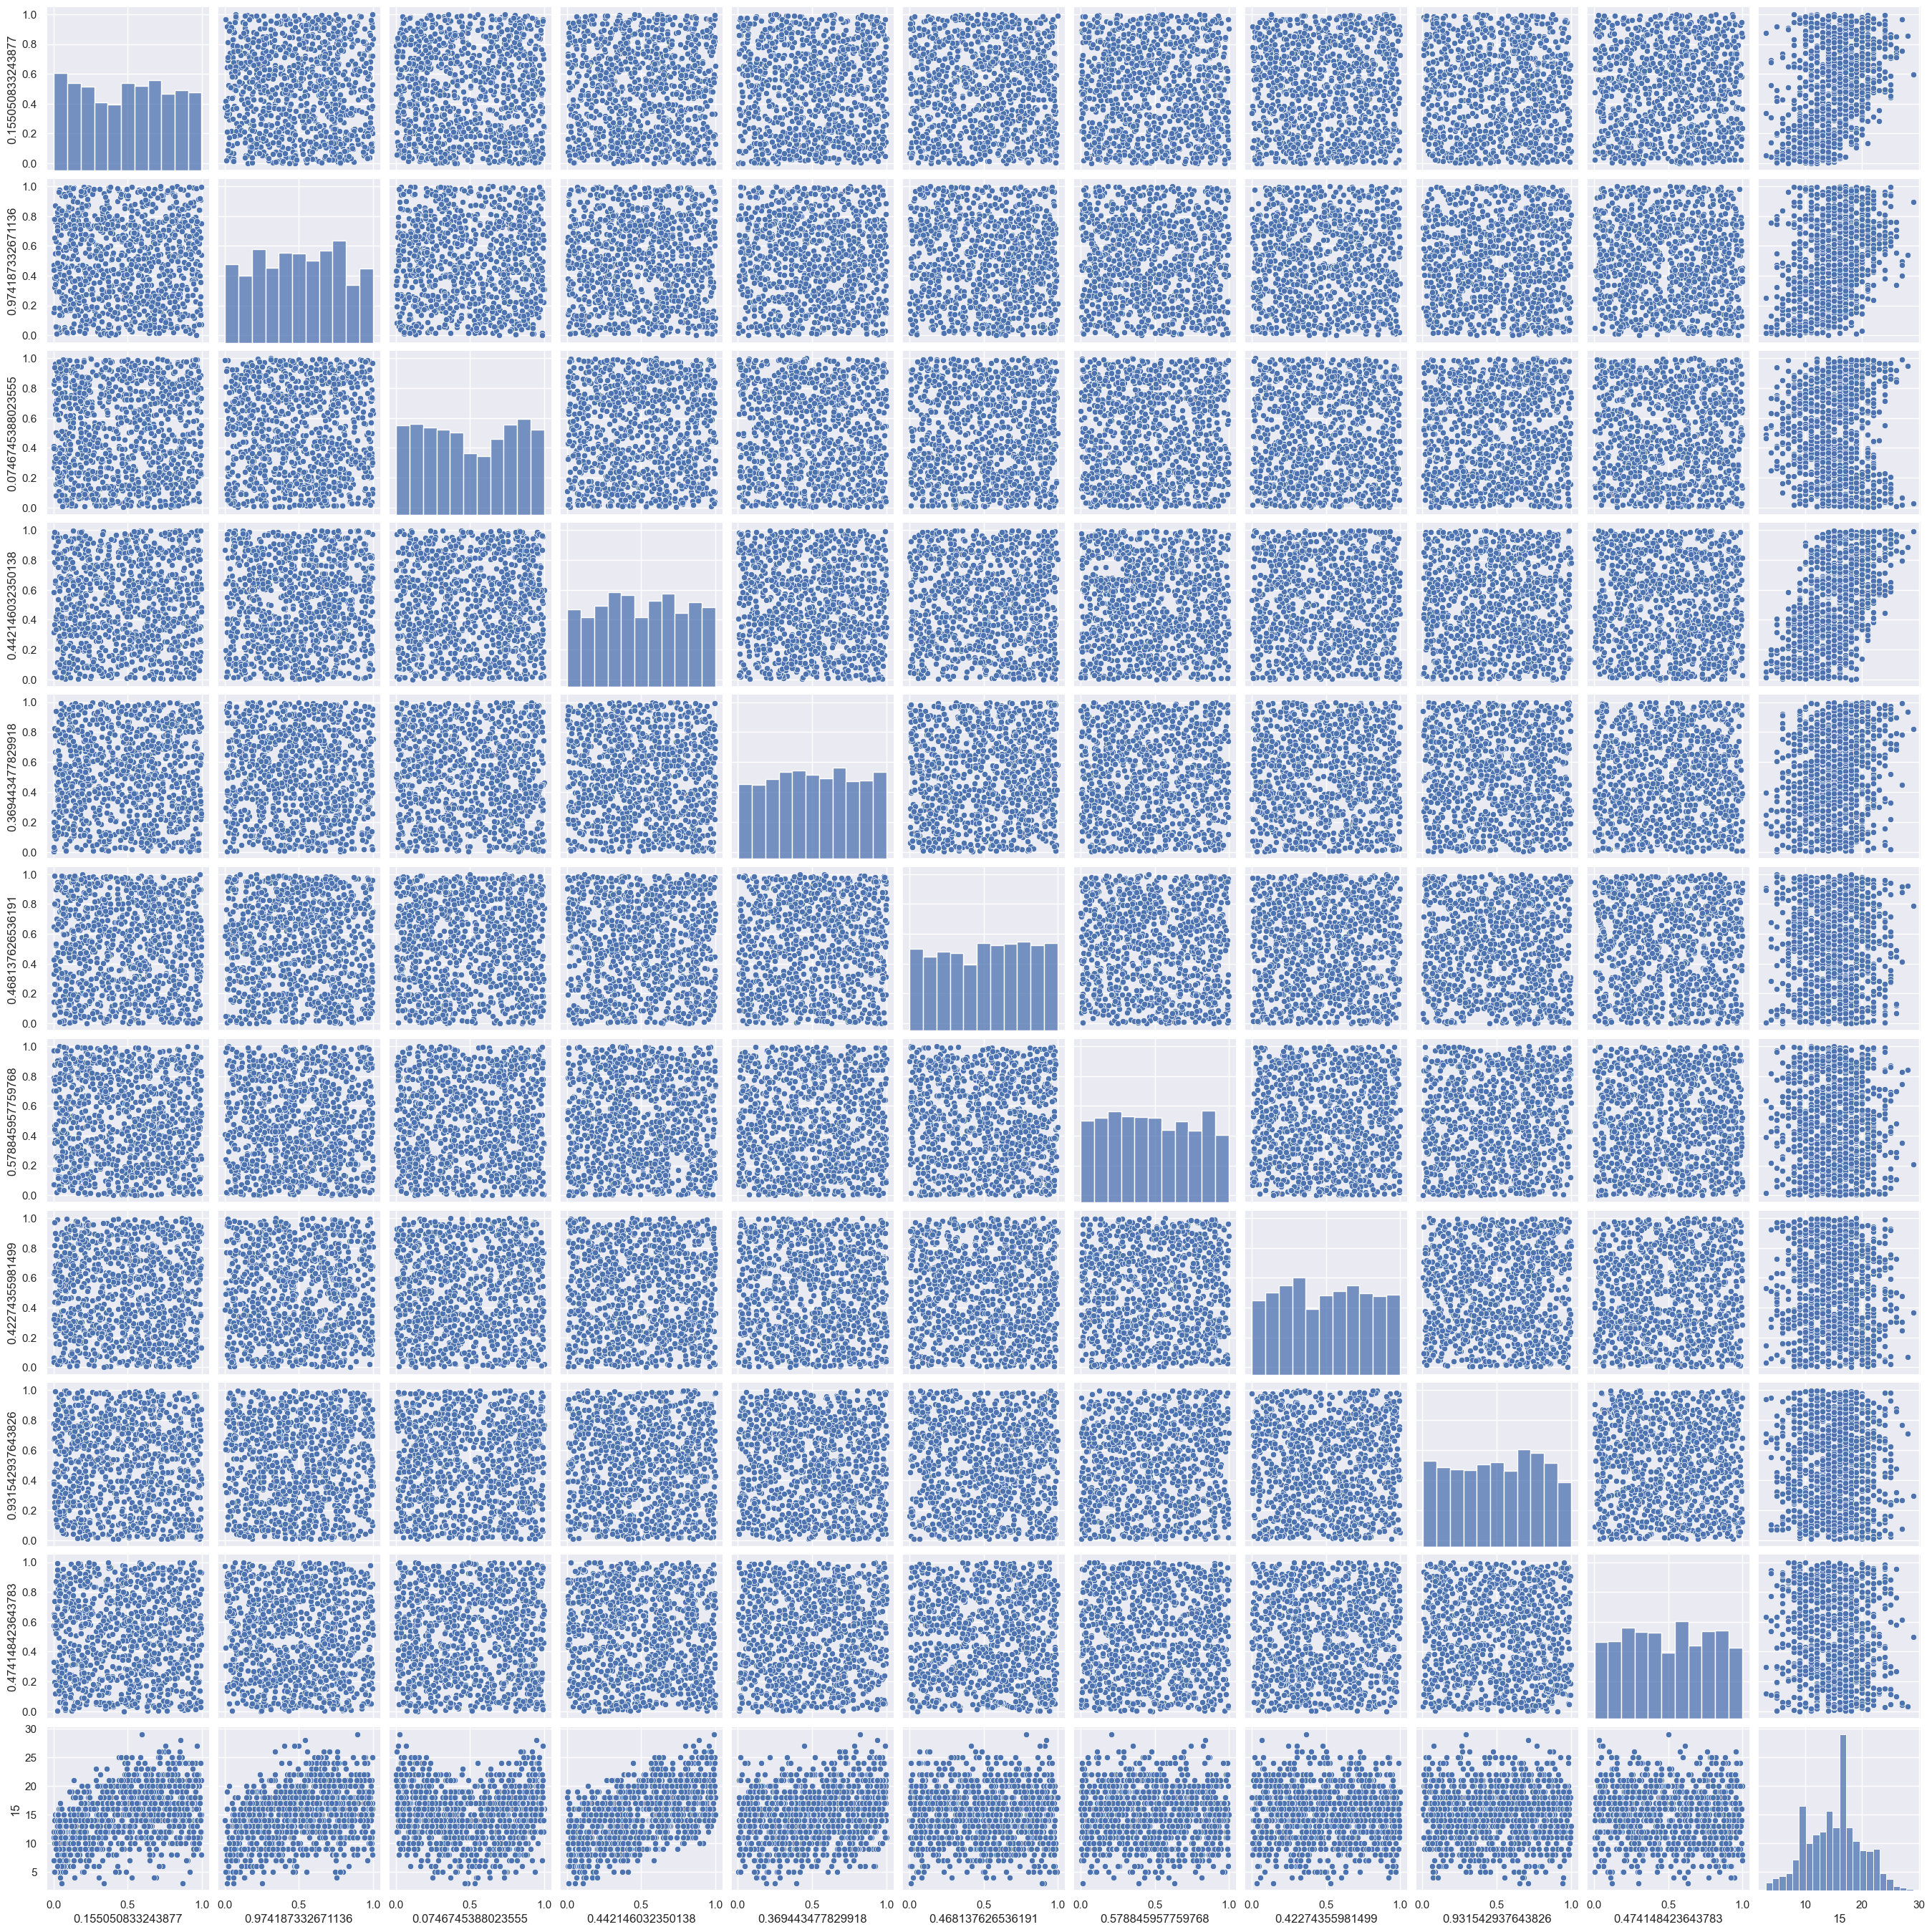

In [56]:
sns.pairplot(df)

In [62]:
array = df.values

X = array[:,0:10]

Y = array[:,10]

# feature extraction

test = SelectKBest(score_func=chi2, k=4)

fit = test.fit(X, Y)

# summarize scores

np.set_printoptions(precision=3)

print(fit.scores_)

features = fit.transform(X)

# summarize selected features

print(features[0:10,:])

[37.299 23.942  4.423 52.38  13.498  4.174  3.763  4.625  4.421  5.139]
[[0.968 0.717 0.51  0.545]
 [0.468 0.406 0.468 0.101]
 [0.777 0.104 0.798 0.907]
 [0.408 0.415 0.935 0.444]
 [0.539 0.089 0.782 0.402]
 [0.207 0.949 0.872 0.466]
 [0.187 0.959 0.553 0.321]
 [0.78  0.733 0.988 0.503]
 [0.194 0.811 0.331 0.518]
 [0.434 0.772 0.371 0.895]]
